# 3.1 Снова возвращаемся к деревьям 

В этом уроке поговорим, почему наши деревья из второго модуля все еще переобучены! Да сколько можно?

## step 2

Мы подходим к завершению краткого введения в `data science`, машинное обучение. 

В этой неделе ещё немного поговорим про решающие деревья; про более продвинутые методы, которые получаются на их основе; затронем скорее в обзорном ключе направления, в которых можно двигаться дальше, если вам интересна эта тема и вы хотите развиваться в машинном обучении; поговорим про всякие интересные штуки; пообщаемся с приглашённым экспертом в нейросетях.

Будет интересно и давайте продолжать.

## step 3

Итак, второй модуль мы завершили на той ноте, что разобрались какую задачу решает модель машинного обучения, если мы решаем задачу классификации. Т.е. задача классификации понятна - классифицировать объект. Но вот как именно подойти к этому решению?

Нам очевидно нужно натренировать наше дерево решений так, чтобы оно смогло на обучающих данных вычленить некоторую закономерность, которую можно было бы обобщить на те наблюдения, которые раньше оно не видело. И в данном случае нам поможет концепция тестового и обучающего множества, валидационного множества, кросс-валидации, подбора оптимального параметра и т.д.

Я думаю, вы уже сразу заметили, что дерево решений в этом смысле как бы и хочет сделать как лучше, а получается, как всегда. 

Дерево решений - ужасно переобучаемый алгоритм. Всё, что в него заложено - вгрызаться в наши данные как можно глубже и на практике это приводит к тому, что, если дерево решений не контролировать, то единственное, что мы получим - переобученное дерево решений, которое очень сильно вычислит закономерности, зависящие от контекста обучающей выборки, а не общую закономерность, которую можно обобщить и на новые данные.

Решением такой проблемы является подбор параметров нашего дерева, и мы разобрали один параметр - глубина, потому что он по сути самый серьезный для дерева решений. При прочих равных чем глубже дерево, тем оно более переобучено. НО! Бывают ситуации, когда глубокое дерево не является переобученным, т.е. просто в данной задаче нельзя обойтись деревом меньшей глубины.

**Запомните: если при прочих равных мы можем добиться сходих метрик качества при меньшей глубине дерева, то лучше обойтись меньшей глубиной.**

Однако даже после тюнинга глубины дерева можно заподозрить, что дерево всё ещё переобучено. на самом деле в каком-то смысле дерево решений всегда будет переобучено - такова природа этого алгоритма. 

Что можно заметить?

У нас как минимум есть всего два наблюдения в одном из финальных прямоугольников. 

![](images/tree.png)

И очевидно, что этот вот if, который разделит исходную более высокую выборку из 107 наблюдений на две части, в одной из которых окажется всего 2 элемента - кажется это довольно частая закономерность. И было бы здорово от этого избавиться. Возможно даже лучше нашему дереву решений будет, если мы заложим некоторое ограничение на то, какой размер выборки мы будем считать допустимым для того, чтобы ещё раз посплититься внутри этой выборки. И первое, что приходит на ум это ограничение глубины дерева. Например, задать глубину дерева 2. Но мы при этом потеряли бы важный третий слой глубины.

Но у дерева есть не только глубина, но и другие важные параметры дерева решений. Например, `min_sample_split` - параметр показывающий допустимый размер выборки для дальнейшего сплита.


# 3.2

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.isnull().sum()
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators' : [10,20,30], 'max_depth':[2,5,7,10]}
grid_serach_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [ ]:
grid_serach_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_serach_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.
```
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
```

В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. К первому относится [эксплоративный анализ](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15) , ( [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis))
, а для второго есть feature engineering.

Пример с Decision Tree или Random Forest - допустим, исходные данные выглядят так:



![alt text](https://ucarecdn.com/8637b654-4cae-4394-97c3-707bc8150ce0/)

Граница, которую проведёт дерево, будет представлять собою ломанную, и деревьям потребуется большая глубина, чтобы разделить данные.  В то же время, если мы просто [повернём](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%BF%D0%BE%D0%B2%D0%BE%D1%80%D0%BE%D1%82%D0%B0) наши данные на 45 градусов, то получим такую картину:

![alt text](https://ucarecdn.com/311c7e2d-5167-4dd0-a088-67d4555ee164/)

Теперь дерево может разделить данные всего за 1 шаг

In [ ]:
best_clf=grid_serach_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [ ]:
feature_importances = best_clf.feature_importances_

In [ ]:
feature_importances_df=pd.DataFrame({'features':list(X_train),
    'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
5,Sex_female,0.265021
6,Sex_male,0.247325
4,Fare,0.139513
0,Pclass,0.129998
1,Age,0.099066
3,Parch,0.036335
2,SibSp,0.034655
9,Embarked_S,0.027752
7,Embarked_C,0.013628
8,Embarked_Q,0.006706


Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.



---

Воспользуемся [данными о сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте



```
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
```



![alt text](https://ucarecdn.com/33d0e286-022e-4435-b112-223d9dfd3af0/)

Код для отрисовки важности фичей


```
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
```



In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X_h = data.drop(['target'], axis=1)
y_h = data.target
from sklearn.model_selection import train_test_split
#X_h_train, X_h_test, y_h_train, y_h_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [ ]:
rf.fit(X_h,y_h)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

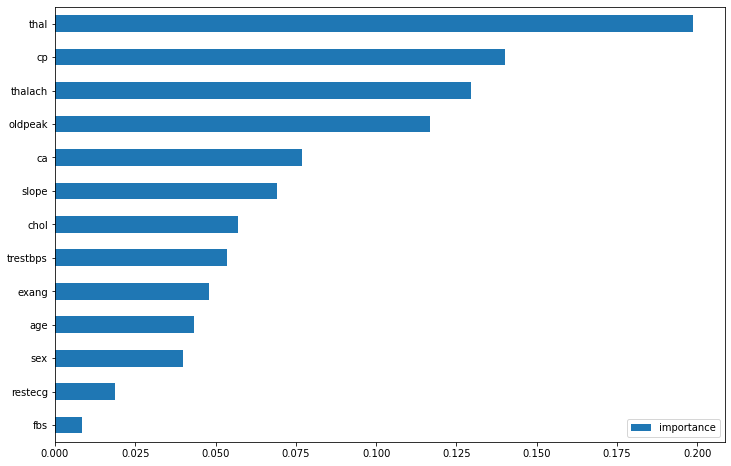

In [ ]:
imp = pd.DataFrame(rf.feature_importances_, index=X_h.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))



---

В ближайшее время раздел о нейронных сетях будет расширен, пока здесь будет немного дополнительных материалов.

1.   [Визуализация работы нейронной сети](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39892&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

2.   [Объяснение обучения ANN](https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e)

3. [Введение в ANN](https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75)

4. [Краткий обзор некоторых видов сетей](https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818)

5. [Объяснение работы свёрточных нейронных сетей](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) (тех самых, которые используются для разделения картинок с людьми и солнышком от других)








https://youtu.be/_q46x0tq2FQ

Если кто заинтересовался нейронными сетями то по этой ссылке вы можете найти отличный курс видеолекций (2019 г.) на РУССКОМ языке. Очень доступный и понятный стиль изложения. Рекомендую!

Очень классная лекция по нейронным сетям от Григория Сапунова

https://www.youtube.com/watch?v=40mnpYTPpJg&feature=youtu.be 

# 3.5

[Данные](https://stepik.org/media/attachments/course/4852/training_mush.csv) о съедобности грибов для части заданий. Взяты [отсюда](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv), все категориальные переменные были закодированы числами для простоты.

In [ ]:
mushroom_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [ ]:
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
mushroom_data_X = mushroom_data.drop(['class'], axis=1)
mushroom_data_y = mushroom_data['class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf_mush = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators' : range(10,60,10), 'max_depth': range(1,13,2), 
             'min_samples_leaf': range(1,8), 'min_samples_split': range(2,9,2)}
grid_serach_cv_clf_mush = GridSearchCV(clf_rf_mush, parametrs, cv = 3, n_jobs=-1)

In [ ]:
grid_serach_cv_clf_mush.fit(mushroom_data_X, mushroom_data_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
grid_serach_cv_clf_mush.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
best_clf_mush=grid_serach_cv_clf_mush.best_estimator_

In [ ]:
feature_importances_mush = best_clf_mush.feature_importances_

In [ ]:
feature_importances_df_mush=pd.DataFrame({'features':list(mushroom_data_X),
    'feature_importances':feature_importances_mush})
feature_importances_df_mush.sort_values('feature_importances', ascending = False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных [грибов](https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [ ]:
test_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
pred_mush = best_clf_mush.predict(test_mush)
pred_mush.sum()

976

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и [правильным ответам](https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip), (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [ ]:
richt_mush_true = pd.read_csv('testing_y_mush.csv')

In [ ]:
from sklearn.metrics import confusion_matrix

cm_mush = confusion_matrix(richt_mush_true, pred_mush)

In [ ]:
import seaborn as sns

sns.heatmap(cm_mush, annot=True,annot_kws={"size": 16})



---



Перейдём к следующему [датасэту](https://stepik.org/media/attachments/course/4852/invasion.csv).

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для [новых поступающих данных](https://stepik.org/media/attachments/course/4852/operative_information.csv). Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
kafer_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [ ]:
kafer_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [ ]:
kafer_data_X = kafer_data.drop(['class'], axis=1)
kafer_data_y = kafer_data['class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf_rf_kafer = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators' : range(10,30,10), 'max_depth': range(12,17), 
             'min_samples_leaf': range(3,8), 'min_samples_split': range(12,20)}
grid_serach_cv_clf_kafer = GridSearchCV(clf_rf_kafer, parametrs, cv = 3, n_jobs=-1)
grid_serach_cv_clf_kafer.fit(kafer_data_X, kafer_data_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
grid_serach_cv_clf_kafer.best_params_ 

{'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 10}

In [ ]:
best_clf_kafer=grid_serach_cv_clf_kafer.best_estimator_

In [ ]:
test_kafer = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
pred_kafer = best_clf_kafer.predict(test_kafer)
pred_kafer

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [ ]:
import collections
collections.Counter(pred_kafer)

Counter({'cruiser': 230, 'fighter': 675, 'transport': 595})

или

In [ ]:
pd.Series(pred_kafer).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

Какая переменная оказалась самой важной для классифицирования кораблей?



In [ ]:
feature_importances_kafer = best_clf_kafer.feature_importances_
feature_importances_df_kafer=pd.DataFrame({'features':list(kafer_data_X),
    'feature_importances':feature_importances_kafer})
feature_importances_df_kafer.sort_values('feature_importances', ascending = False)

,features,feature_importances
3,brightness,0.388900
5,volume,0.226599
2,speed,0.184667
1,i_reflection,0.114898
0,g_reflection,0.084723
4,time_of_observance,0.000214


или

In [ ]:
pd.Series(grid_serach_cv_clf_kafer.best_estimator_.feature_importances_, index=test_kafer.columns).idxmax()

Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся [данные об опасности разных регионов космоса](https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv) и укажите наиболее вероятные причины угрозы

In [ ]:
danger_kafer = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
danger_kafer.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [ ]:
danger_data_X = danger_kafer.drop(['dangerous'], axis=1)
danger_data_y = danger_kafer['dangerous']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf_rf_danger = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators' : range(10,30,10), 'max_depth': range(12,13), 
             'min_samples_leaf': range(6,8), 'min_samples_split': range(12,13)}
grid_serach_cv_clf_danger = GridSearchCV(clf_rf_danger, parametrs, cv = 3, n_jobs=-1)
grid_serach_cv_clf_danger.fit(danger_data_X, danger_data_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
best_clf_danger=grid_serach_cv_clf_danger.best_estimator_
feature_importances_danger = best_clf_danger.feature_importances_
feature_importances_df_danger=pd.DataFrame({'features':list(danger_data_X),
    'feature_importances':feature_importances_danger})
feature_importances_df_danger.sort_values('feature_importances', ascending = False)

,features,feature_importances
5,buggers_were_noticed,0.493591
6,nearby_system_has_planemo,0.371963
3,dustiness,0.034911
1,phi,0.029316
2,peradventure_index,0.028416
0,r,0.028081
4,black_hole_is_near,0.013722


или

Самое простое, что пришло в голову - это построить корреляционную матрицу:
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Blues)

В итоге видим, что опасность имеет более-менее ощутимую положительную корреляцию с планемо и присутствием жукеров в системе, но не с черными дырами.

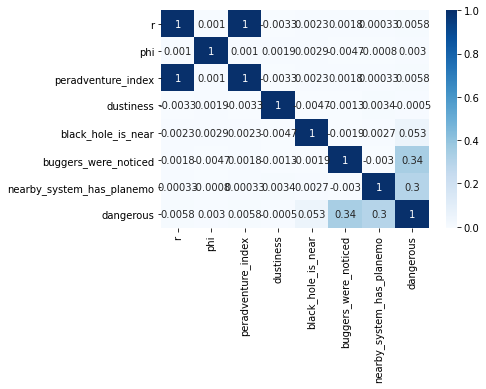

In [ ]:
sns.heatmap(danger_kafer.corr(), annot=True, cmap=plt.cm.Blues)

или


```
df.[['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous']].corr()
```



In [ ]:
danger_kafer[['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous']].corr()

или

In [ ]:
zhd=pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

[zhd[(zhd.dangerous==1) & (zhd.black_hole_is_near==1)].size, 
 zhd[(zhd.dangerous==1) & (zhd.buggers_were_noticed==1)].size,
 zhd[(zhd.dangerous==1) & (zhd.nearby_system_has_planemo==1)].size]/zhd.size

или

In [ ]:
pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv').corr()



---



Данный урок оказался немного оторванным от остального курса, поэтому нужно добавить информации перед его прохождением.

Речь пойдёт об алгоритме для подбора параметров нейронных сетей, так что вкратце обговорим их  устройство, чтобы понимать о чём идёт речь. Нейронные сети можно представлять как набор нейронов, соединённых связями. Каждый нейрон - это вычислительная единица, принимающая числовые значения от входных связей, умножающая их на соответствующие им веса. Затем получившиеся результаты складываются, и к ним применяется активационная функция нейрона. Результат передаётся по выходным связям.
То есть нейронную сеть можно представить как граф, где вершинами являются нейроны, а рёбрами - связи между ними. Пространственно нейроны обычно организованы в виде слоёв, и информация (значения переменных во входных данных и результаты вычислений нейронов) передаётся слева направо.

![alt text](https://ucarecdn.com/6570d693-db78-4f35-a501-a0790a248557/)

На рисунке выше приведена схема нейронной сети - слева на нейроны поступают значения переменных для наблюдения, они процессируются нейронами 1-ого слоя и результат вычислений передаётся на нейроны 2-ого слоя по связям, и так далее. Последний слой предсказывает класс (в случае классификации).

В отличие от решающих деревьев и Random Forest нейронные сети потрясающе разнообразны - число нейронов, их расположение по слоям, активационные функции, наличие связей между нейронами и их величина могут варьироваться для получения более эффективных нейронных сетей.

Об одном из способов подбора этих параметров и пойдёт речь.

Нейроэволюция не является наиболее используемым методом подбора модели по причине больших временных затрат - необходимо на каждом шаге проверять успешность каждой из моделей в популяции. Но возможность искать более успешные топологии является его явным преимуществом.

Немного дополнительных материалов:

1) [Описание NEAT и иллюстрация его использования на модели, играющей в Flappy Bird](https://medium.com/datadriveninvestor/neuroevolution-neat-algorithm-and-my-neat-b83c5174d8b0)

2) [Видео с игрой моделей, эволюционирующих по NEAT'у](https://www.youtube.com/watch?v=aeWmdojEJf0&feature=youtu.be)

3) [Исходная статья](http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf)

Нужно отметить, что, как говорилось, разные методы машинного обучения лучше подходят к различным задачам. Вдобавок к этому ML не всегда является оптимальным подходом - при наличии чёткого аналитического решения нужно использовать его, так как обычно оно требует меньше ресурсов и полностью проработано (понятно почему получается такой результат, меньше ошибка). Например, рассчитывать пройденное расстояние, зная скорость и время лучше по формуле, чем обучая модель на тестовых данных)

[Решение задачки](https://habr.com/en/post/217645/) с Flappy Bird и [видео](https://www.youtube.com/watch?v=-nYo_sThziU&feature=youtu.be) с применением алгоритма.

# 3.7

In [1]:
import numpy as np
import pandas as pd

In [2]:
movie = pd.read_csv('movie_metadata.csv')
genres = movie[['movie_title', 'genres']]
genres.tail()

,movie_title,genres
5038,Signed Sealed Delivered,Comedy|Drama
5039,The Following,Crime|Drama|Mystery|Thriller
5040,A Plague So Pleasant,Drama|Horror|Thriller
5041,Shanghai Calling,Comedy|Drama|Romance
5042,My Date with Drew,Documentary


In [3]:
for i in genres.columns:
  print(i)

movie_title
genres


In [4]:
for i in genres.values:
  print(i)

Выходные данные были обрезаны до нескольких последних строк (5000).
['Harry Potter and the Deathly Hallows: Part II\xa0' 'Action|Fantasy']
['Night at the Museum: Secret of the Tomb\xa0'
 'Adventure|Comedy|Family|Fantasy']
['Megamind\xa0' 'Action|Animation|Comedy|Family|Sci-Fi']
["Harry Potter and the Sorcerer's Stone\xa0" 'Adventure|Family|Fantasy']
['R.I.P.D.\xa0' 'Action|Comedy|Fantasy']
['Godzilla Resurgence\xa0' 'Action|Adventure|Drama|Horror|Sci-Fi']
['Pirates of the Caribbean: The Curse of the Black Pearl\xa0'
 'Action|Adventure|Fantasy']
['Harry Potter and the Deathly Hallows: Part I\xa0' 'Fantasy']
['The Hunger Games: Mockingjay - Part 1\xa0' 'Adventure|Sci-Fi|Thriller']
['The Da Vinci Code\xa0' 'Mystery|Thriller']
['Rio 2\xa0' 'Adventure|Animation|Comedy|Family|Musical']
['X-Men 2\xa0' 'Action|Adventure|Fantasy|Sci-Fi|Thriller']
['Fast Five\xa0' 'Action|Crime|Thriller']
['Sherlock Holmes: A Game of Shadows\xa0'
 'Action|Adventure|Crime|Mystery|Thriller']
['Clash of the Titans\

In [5]:
def reversator(value):
  return value[::-1]

In [6]:
for i, row in genres.iterrows():
  print(row.map(reversator))

Выходные данные были обрезаны до нескольких последних строк (5000).
Name: 3376, dtype: object
movie_title                      eramthgiN weN
genres         rellirhT|yretsyM|rorroH|ysatnaF
Name: 3377, dtype: object
movie_title          yzarC eM evirD
genres         ecnamoR|amarD|ydemoC
Name: 3378, dtype: object
movie_title     eeB eht dna haleekA
genres                        amarD
Name: 3379, dtype: object
movie_title      dekaB flaH
genres         emirC|ydemoC
Name: 3380, dtype: object
movie_title       nwoT ni weN
genres         ecnamoR|ydemoC
Name: 3381, dtype: object
movie_title           anairyS
genres         rellirhT|amarD
Name: 3382, dtype: object
movie_title     ohcysP naciremA
genres              amarD|emirC
Name: 3383, dtype: object
movie_title     lriG dooG ehT
genres          ecnamoR|amarD
Name: 3384, dtype: object
movie_title                 poC daB poC noB
genres         rellirhT|emirC|ydemoC|noitcA
Name: 3385, dtype: object
movie_title     yaD stniaS llA :II stniaS kcod

In [7]:
for i, col in genres.iteritems():
  print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

In [8]:
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


добавляет 1 ко всем значениям везде



In [9]:
budget.applymap(lambda x: x+1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


также и transform, но размер результирующий должен быть тот же

Среднее по колоночно



In [10]:
budget.apply(np.mean, axis = 0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [11]:
def mm(col):
  return np.mean(col)+1

In [12]:
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

или

In [13]:
budget.mean() +1

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [14]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

 

[Пример датасэта для тестирования](https://stepik.org/media/attachments/course/4852/iris.csv)

При использовании jupyter notebook можно оттестировать скорость выполнения кода при помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение



```
%%timeit
your_command
```


Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time


```
from time import time
before = time()
your_command
after = time()
print(after - before)
```


 

In [15]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

1

In [16]:
from time import time
before = time()
df.mean(axis=0)
after = time()
print(after - before)

0.0022614002227783203


2

In [17]:
from time import time
before = time()
df.apply('mean')
after = time()
print(after - before)

0.0029840469360351562


3

In [18]:
before = time()
df.describe().loc['mean']
after = time()
print(after - before)

0.027350187301635742


4

In [19]:
before = time()
df.apply(np.mean)
after = time()
print(after - before)

0.0021300315856933594




---



In [20]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv')
stock.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


In [21]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', 
                   index_col = 'Date', parse_dates=True)
stock.head()


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [23]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [24]:
stock['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [25]:
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN


In [26]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


Допустим мы хотим найти среднее в колонке некоторых строк (не всех) до какой-то строки. Rolling считает среднее каличества строк указанных в скобках (скользящее окно)

In [27]:
stock.rolling(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [28]:
stock.rolling(3, min_periods = 1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


expanding - считает значения в каждой строке среднее (в данном случае) от всех предыдущих. В скобочках задается окно

In [29]:
stock.expanding().mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [30]:
stock.expanding(3).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06


In [31]:
stock.ewm(alpha = 0.7).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06


используется для сглаживания кривых

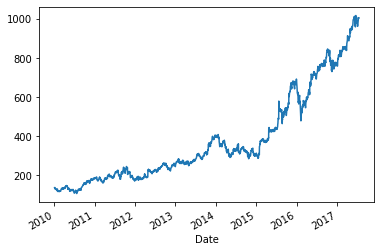

In [33]:
stock['Open'].plot()

сгладим эту функцию

In [34]:
ns = stock['Open'].rolling(10, min_periods = 1).mean()
ns.head()

Date
2010-01-04    136.2500
2010-01-05    134.8400
2010-01-06    134.7600
2010-01-07    134.0725
2010-01-08    133.3700
Name: Open, dtype: float64

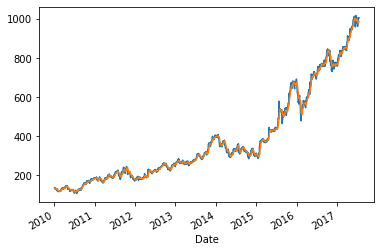

In [35]:
stock['Open'].plot()
ns.plot()

К вам попали наблюдения о числе перелетающих на зимовку стрижей, представленные в виде пандасовской серии wintering. В каждой ячейке указано число пролетевших птиц за этот день. Посчитайте с помощью expanding окна количество всех перелетевших птиц за всё время до данного и поместите в переменную total_birds.



```
import pandas as pd
total_birds = wintering.expanding().sum()
```



In [41]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [42]:
stock.index.dayofyear

Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)

Извлечь из дат года

In [43]:
stock.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

Извлечь из дат названия месяцев

In [44]:
stock.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

Получить номер среднего дня в году

In [45]:
np.mean(stock.index.dayofyear)

178.00632911392404

Число дней каждого из чисел месяца

In [46]:
stock.index.day.value_counts()

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64



---





---



Итак, надеемся, что пройдя этот курс вы познакомились с анализом данных с помощью питона, поняли как работают Decision Tree и Random Forest и просто узнали что-то новое. Мир машинного обучения велик, и каждый год придумывают новые методы (не говоря уже о новых библиотеках/фрэймворках, которые чем-то лучше а иногда хуже существовавших до этого). Наш курс представляет собой лишь небольшое введение в эту чудесную область, которую, мы надеемся, вы будете изучать дальше. Для этого, приведём здесь некоторые полезные курсы и книги.

Курсы:

1) [Курс по Data Science от UCSD](https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE200x+2T2017/course/) - это линейка из 4-ёх курсов, затрагивающая DS вообще, теорию вероятностей, машинное обучение и работу с большими объёмами данных

2) [Курс по линейной алгебре](https://courses.edx.org/courses/course-v1:UTAustinX+UT.5.05x+2T2017/course/) - теоретический курс по линалу, базовые знания которого нужны для нейронных сетей

3) [Курс по ML раз](https://courses.edx.org/courses/course-v1:UCSanDiegoX+DS220x+1T2018/course/)

4) [Курс по ML два](https://courses.edx.org/courses/course-v1:ColumbiaX+CSMM.102x+2T2017/course/)

5) [Знаменитый курс по ML от Andrew Ng](https://www.coursera.org/learn/machine-learning)

6) [Линейка курсов по Deep Learning от Andrew Ng](https://www.coursera.org/specializations/deep-learning)

7) [Курс от ODS](https://mlcourse.ai/)

8) [Ещё один крутой курс](https://www.fast.ai/)

Книги:

1) [Книга по применению sklearn для ML](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)

2) [Книга по пандасу от его создателя](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython-ebook/dp/B075X4LT6K)

3) [Книга с пандасовскими рецептами](https://github.com/iamseancheney/pythonbooks/blob/master/Pandas%20Cookbook%20%EF%BC%8DTheodore%20Petrou.pdf)

4) [Ещё книга о пандасе и ML](https://jakevdp.github.io/PythonDataScienceHandbook/)

5) [Теория](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)



---



Небольшой список интересных достижений машинного обучения

1) [SC2](https://www.youtube.com/watch?v=PFMRDm_H9Sg)

2) [Привет, Чёрное зеркало!](https://medium.com/@TebbaVonMathenstien/deep-fakes-and-the-future-of-propaganda-18a257026571)

3) [Исследования](https://towardsdatascience.com/machine-learning-is-the-future-of-cancer-prediction-e4d28e7e6dfa) для постановки диагноза у раковых больных

4) [Покер](https://www.deepstack.ai/)

5) [Рисование](https://deepdreamgenerator.com/)



---



Помимо sklearn есть множество других библиотек для ML со своими возможностями. Некоторые из них сложнее, некоторые проще.

![alt text](https://ucarecdn.com/2ce9863f-f17b-4ac3-b139-b5b3f7adc2a1/)

Краткое перечисление:

1) [pytorch](https://pytorch.org/)

2) [keras](https://keras.io/)

3) [theano](http://deeplearning.net/software/theano/introduction.html)

4) [TensorFlow](https://www.tensorflow.org/)

5) [Caffe](https://caffe.berkeleyvision.org/)

6) [xgboost](https://xgboost.readthedocs.io/en/latest/)

Ну а также практикуйтесь, ведь для этого есть отличная площадка - [Kaggle](https://www.kaggle.com/). Там содержится множество датасэтов, соревнований по машинному обучению с призами и kernel'ы, в которых можно узнать много нового.

А также [ссылка](https://www.dataquest.io/blog/free-datasets-for-projects/) на перечень ресурсов с данными, которые можно использовать.

А еще мы всегда в поисках крутых аналитиков и дата ученых!

Кто это мы? Мы - команда бизнеса и рекламы ВКонтакте. 

Что нужно делать? Заниматься продуктовой аналитикой, фитить модельки, программировать, развивать понятную и красивую систему визуализации данных и вот это все.

В общем, если вы любите data science, бизнес, машинное обучение, пишите мне [ВКонтакте](https://vk.com/anatoly1804) или на почту anatoly1804@gmail.com, расскажу обо всем подробнее.

На фото наша команда аналитиков идет выгружать данные из хадупа, присоединяйтесь! 

На этом у нас все, до встречи!





---



4.1

Мы начинаем соревнование! 

Задача нам уже знакома - нужно предсказать, сможет ли пользователь успешно закончить онлайн курс [Анализ данных в R](https://stepik.org/course/129/syllabus).

Мы будем считать, что пользователь успешно закончил курс, если он правильно решил больше 40 практических заданий.

В данных:

[submission_data_test.csv
](https://stepik.org/media/attachments/course/4852/submission_data_test.csv)

[events_data_test.csv
](https://stepik.org/media/attachments/course/4852/events_data_test.csv)

хранится информация о решениях и действиях для 6184 студентов за первые два дня прохождения курса. Это 6184 студентов, которые проходили курс в период с мая 2018 по январь 2019. Подробное описание переменных смотри в [этом шаге](https://stepik.org/lesson/222124/step/3?unit=195045).  

Используя данные о первых двух днях активности на курсе вам нужно предсказать, наберет ли пользователь более 40 баллов на курсе или нет.

В этих данных, вам доступны только первые дня активности студентов для того, чтобы сделать предсказание. На самом деле, используя эти данные, вы уже можете сделать прогноз. Например, если пользователь за первые два дня набрал 40 баллов, скорее всего он наберет более 40 баллов в дальнейшем. Чтобы подкрепить такие гипотезы, вы можете использовать [данные](http://stepik.org/lesson/222124/step/3?unit=195045), на которые мы исследовали в первых двух модулях курса, где для всех пользователей представлены все данные об их активности на курсе. 


Итогом вашей работы должен стать csv файл c предсказанием для каждого студента из тестовых данных. Пример предсказания выглядит [следующим образом](https://stepik.org/media/attachments/course/4852/submission_example.csv).

Чтобы узнать точность ваших предсказаний, в качестве решения этого шага отпраьте файл с предсказаниями для каждого студента в указанном выше формате.

Убедитесь, что вы сформировали файл с предсказаними для всех 6184 студентов, для каждого студента должна быть предсказана вероятность, что он наберет более 40 баллов за курс. У вас есть 25 попыток засабмитить решения, в зачет пойдет наилучший вариант.

Результатом проверки этого задания будет значение ROC AUC score, именно по этому показателю мы и отберем победителей, успехов!

Результаты лучших студентов, которые приняли участие в соревовании:

Пример решения

https://github.com/ded42r/stepik_course_4852_contest